In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import pickle

In [2]:
from sklearn.model_selection import train_test_split

# Time Series Data with 600 scalar values 

In [64]:
#data_time = np.sin(np.arange(400)) + np.random.normal(0,0.1,400) + np.arange(400)/200
# 1: underline function   2:noise   3:granualt increase


data_time = np.cos(np.arange(600)) + np.random.normal(0,0.1,600) + np.arange(600)/300


#data_time = np.cos(np.arange(800)) + np.random.normal(0,0.1,800) + np.arange(800)/200

In [65]:
data_time.shape

(600,)

(-1.1, 3.1)

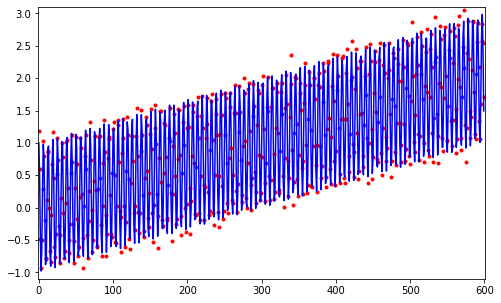

In [108]:
plt.figure(figsize=(8,5))
plt.plot(data_time , 'r.')
plt.plot(range(600) ,  np.cos(np.arange(600)) + np.arange(600)/300 , 'b')

plt.xlim(-0.5,600.5)
plt.ylim(-1.1,3.1)

In [109]:
data_matrix = []
seq_len = 3

for i in range(0,len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

In [110]:
data_matrix = np.array(data_matrix)

In [111]:
data_matrix.shape

(597, 4)

In [112]:
data_matrix

array([[ 1.18153384,  0.5956967 , -0.48098074, -0.92790476],
       [ 0.5956967 , -0.48098074, -0.92790476, -0.50350042],
       [-0.48098074, -0.92790476, -0.50350042,  0.28248172],
       ...,
       [ 1.06343394,  1.59886347,  2.56890337,  2.84282477],
       [ 1.59886347,  2.56890337,  2.84282477,  2.53749869],
       [ 2.56890337,  2.84282477,  2.53749869,  1.7053368 ]])

In [113]:
data_time[:10]

array([ 1.18153384,  0.5956967 , -0.48098074, -0.92790476, -0.50350042,
        0.28248172,  1.02973264,  0.79523487, -0.18718699, -0.78553392])

# split x,y

In [114]:
x_data = data_matrix[:,:-1]
y_data = data_matrix[:,-1]

In [115]:
x_data.shape,y_data.shape

((597, 3), (597,))

# Only slicing Assuming it is time_series dat
# 시간이 의미가 없으면 이런식으로 slicing하면 안된다

In [116]:
train_x = x_data[:500,:]
train_y = y_data[:500]

test_x = x_data[500:,:]
test_y = y_data[500:]

In [117]:
train_x.shape, train_y.shape , test_x.shape , test_y.shape

((500, 3), (500,), (97, 3), (97,))

In [118]:
train_x = train_x.astype(np.float32)
train_y =train_y.astype(np.float32)
test_x = test_x.astype(np.float32)
test_y = test_y.astype(np.float32)

In [119]:
train_x.shape[1]

3

# MLP model

In [126]:
input_shape = (train_x.shape[1],)

# model = keras.Sequential()
# model.add(keras.layers.Dense(20 , activation='tanh' , input_shape = input_shape))
# model.add(keras.layers.Dense(10, activation='tanh'))

# model.add(keras.layers.Dense(1,activation='linear'))

model = keras.Sequential()
model.add(keras.layers.Dense(20 , input_shape = input_shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('tanh'))

model.add(keras.layers.Dense(10))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('tanh'))


model.add(keras.layers.Dense(1,activation='linear'))




In [147]:
model.compile(optimizer='Adam' , loss='mean_squared_error',metrics=['mean_squared_error'])

In [148]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

In [156]:
history = model.fit(train_x,train_y , validation_data=[test_x,test_y],epochs=300,batch_size=16)

Train on 500 samples, validate on 97 samples
Epoch 1/300
500/500 [==============================] - 0s 241us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.1610 - val_mean_squared_error: 0.1610
Epoch 2/300
500/500 [==============================] - 0s 182us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 3/300
500/500 [==============================] - 0s 183us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1699 - val_mean_squared_error: 0.1699
Epoch 4/300
500/500 [==============================] - 0s 175us/sample - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1451 - val_mean_squared_error: 0.1451
Epoch 5/300
500/500 [==============================] - 0s 199us/sample - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 6/300
500/500 [==============================] - 0s 177us/sample - loss: 0.0982 - mean_squared_error: 0.0982 - val

500/500 [==============================] - 0s 175us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 50/300
500/500 [==============================] - 0s 176us/sample - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.1466 - val_mean_squared_error: 0.1466
Epoch 51/300
500/500 [==============================] - 0s 196us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 52/300
500/500 [==============================] - 0s 174us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 53/300
500/500 [==============================] - 0s 183us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1066 - val_mean_squared_error: 0.1066
Epoch 54/300
500/500 [==============================] - 0s 191us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch

Epoch 98/300
500/500 [==============================] - 0s 208us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1138 - val_mean_squared_error: 0.1138
Epoch 99/300
500/500 [==============================] - 0s 189us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 100/300
500/500 [==============================] - 0s 200us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.1171 - val_mean_squared_error: 0.1171
Epoch 101/300
500/500 [==============================] - 0s 165us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 102/300
500/500 [==============================] - 0s 172us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1546 - val_mean_squared_error: 0.1546
Epoch 103/300
500/500 [==============================] - 0s 170us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.1645 - val_mean_squared_er

500/500 [==============================] - 0s 189us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 147/300
500/500 [==============================] - 0s 189us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 148/300
500/500 [==============================] - 0s 177us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 149/300
500/500 [==============================] - 0s 193us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 150/300
500/500 [==============================] - 0s 170us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0805 - val_mean_squared_error: 0.0805
Epoch 151/300
500/500 [==============================] - 0s 171us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.1441 - val_mean_squared_error: 0.1441


500/500 [==============================] - 0s 180us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 195/300
500/500 [==============================] - 0s 180us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.1629 - val_mean_squared_error: 0.1629
Epoch 196/300
500/500 [==============================] - 0s 172us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 197/300
500/500 [==============================] - 0s 169us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 198/300
500/500 [==============================] - 0s 179us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1141 - val_mean_squared_error: 0.1141
Epoch 199/300
500/500 [==============================] - 0s 170us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


500/500 [==============================] - 0s 177us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 243/300
500/500 [==============================] - 0s 174us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1071 - val_mean_squared_error: 0.1071
Epoch 244/300
500/500 [==============================] - 0s 173us/sample - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 245/300
500/500 [==============================] - 0s 168us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1059 - val_mean_squared_error: 0.1059
Epoch 246/300
500/500 [==============================] - 0s 177us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 247/300
500/500 [==============================] - 0s 169us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.1081 - val_mean_squared_error: 0.1081


500/500 [==============================] - 0s 178us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 291/300
500/500 [==============================] - 0s 172us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.1097 - val_mean_squared_error: 0.1097
Epoch 292/300
500/500 [==============================] - 0s 168us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 293/300
500/500 [==============================] - 0s 183us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 294/300
500/500 [==============================] - 0s 180us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1332 - val_mean_squared_error: 0.1332
Epoch 295/300
500/500 [==============================] - 0s 176us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.1132 - val_mean_squared_error: 0.1132


# Saving information

In [207]:

#save history of model
with open('model_1_history','wb') as file_pi:
     pickle.dump(history.history, file_pi)

# load history of model
# history = pickle.load(open('model_1_history', "rb"))



#model saved as best_hyper_tuned_model_num2

model.save('model_1.h5')

#to load model
#model = tf.keras.models.load_model('model_1.h5')

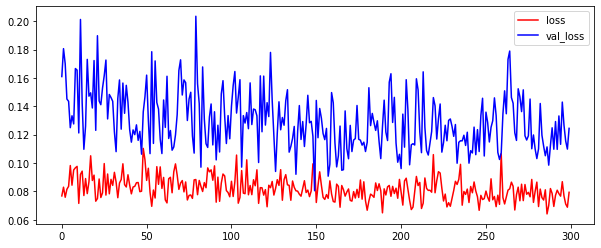

In [158]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],'r' ,label='loss')
plt.plot(history.history['val_loss'],'b' ,label='val_loss')
plt.legend()

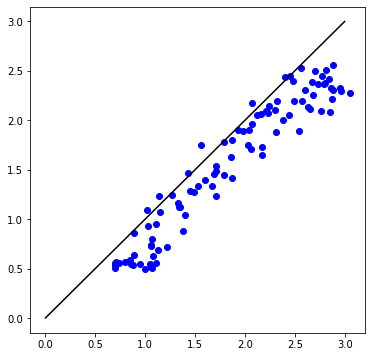

In [162]:
plt.figure(figsize=(6,6))
plt.scatter(test_y , model.predict(test_x),color='blue')
plt.plot([0,3],[0,3],color='black')

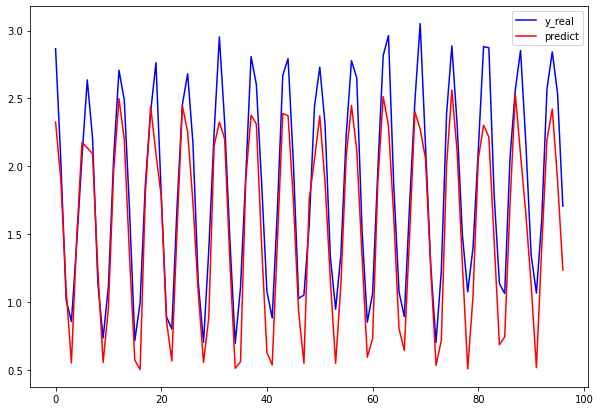

In [160]:
plt.figure(figsize=(10,7))
plt.plot(range(test_y.shape[0]),test_y,'b',label='y_real')
plt.plot(range(test_y.shape[0]),model.predict(test_x),'r' , label='predict')
plt.legend()

# MSE of MLP

In [161]:
print("final val error : %f" %history.history['val_mean_squared_error'][-1])

final val error : 0.124434


# Many to Many

In [25]:
batch_size = 10
seq_length = 4
data_dim = 3

In [163]:
datax  = data_matrix[0:data_matrix.shape[0]-1, 0:3]
datay = data_matrix[0:data_matrix.shape[0]-1: ,3]

datax.shape,datay.shape

((596, 3), (596,))

In [164]:
datax = np.reshape(datax , (-1,seq_length , data_dim))
datay = np.reshape(datay , (-1,seq_length , 1))
datax.shape , datay.shape

((149, 4, 3), (149, 4, 1))

In [166]:
t_x = datax[0:120,:]
t_y = datay[0:120]

te_x = datax[120: , :]
te_y = datay[120:]

t_x.shape, t_y.shape,te_x.shape,te_y.shape


((120, 4, 3), (120, 4, 1), (29, 4, 3), (29, 4, 1))

In [169]:
from tensorflow.keras import layers, models,optimizers
input_shape = datax[0].shape
input_tensor = layers.Input(input_shape)
input_shape

(4, 3)

# LSTM + DROP_OUT

In [170]:
rnn_layer = layers.LSTM(20,return_sequences=True)(input_tensor)
rnn_layer = (layers.Dropout(0.2))(rnn_layer)
output_tensor = layers.TimeDistributed(layers.Dense(1,activation='linear'))(rnn_layer)


In [171]:
model_2 = models.Model(input_tensor,output_tensor)
model_2.compile(optimizer='Adam' , loss='mean_squared_error', metrics=['mean_squared_error'])

In [172]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 3)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 20)             1920      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 20)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 1)              21        
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


In [173]:
history_2 = model_2.fit(t_x,t_y , validation_data=[te_x,te_y],epochs=300,batch_size=32)

Train on 120 samples, validate on 29 samples
Epoch 1/300
120/120 [==============================] - 2s 20ms/sample - loss: 1.1880 - mean_squared_error: 1.1880 - val_loss: 3.0442 - val_mean_squared_error: 3.0442
Epoch 2/300
120/120 [==============================] - 0s 450us/sample - loss: 1.1186 - mean_squared_error: 1.1186 - val_loss: 2.8213 - val_mean_squared_error: 2.8213
Epoch 3/300
120/120 [==============================] - 0s 490us/sample - loss: 1.0687 - mean_squared_error: 1.0687 - val_loss: 2.6085 - val_mean_squared_error: 2.6085
Epoch 4/300
120/120 [==============================] - 0s 465us/sample - loss: 1.0132 - mean_squared_error: 1.0132 - val_loss: 2.4041 - val_mean_squared_error: 2.4041
Epoch 5/300
120/120 [==============================] - 0s 455us/sample - loss: 0.9762 - mean_squared_error: 0.9762 - val_loss: 2.2282 - val_mean_squared_error: 2.2282
Epoch 6/300
120/120 [==============================] - 0s 479us/sample - loss: 0.9241 - mean_squared_error: 0.9241 - val_

120/120 [==============================] - 0s 470us/sample - loss: 0.2472 - mean_squared_error: 0.2472 - val_loss: 0.4971 - val_mean_squared_error: 0.4971
Epoch 50/300
120/120 [==============================] - 0s 491us/sample - loss: 0.2448 - mean_squared_error: 0.2448 - val_loss: 0.4854 - val_mean_squared_error: 0.4854
Epoch 51/300
120/120 [==============================] - 0s 448us/sample - loss: 0.2407 - mean_squared_error: 0.2407 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 52/300
120/120 [==============================] - 0s 484us/sample - loss: 0.2326 - mean_squared_error: 0.2326 - val_loss: 0.4434 - val_mean_squared_error: 0.4434
Epoch 53/300
120/120 [==============================] - 0s 464us/sample - loss: 0.2355 - mean_squared_error: 0.2355 - val_loss: 0.4226 - val_mean_squared_error: 0.4226
Epoch 54/300
120/120 [==============================] - 0s 480us/sample - loss: 0.2260 - mean_squared_error: 0.2260 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch

Epoch 98/300
120/120 [==============================] - 0s 478us/sample - loss: 0.1359 - mean_squared_error: 0.1359 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 99/300
120/120 [==============================] - 0s 468us/sample - loss: 0.1329 - mean_squared_error: 0.1329 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 100/300
120/120 [==============================] - 0s 465us/sample - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 101/300
120/120 [==============================] - 0s 428us/sample - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 102/300
120/120 [==============================] - 0s 438us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.1989 - val_mean_squared_error: 0.1989
Epoch 103/300
120/120 [==============================] - 0s 455us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.1976 - val_mean_squared_er

120/120 [==============================] - 0s 434us/sample - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 147/300
120/120 [==============================] - 0s 422us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 148/300
120/120 [==============================] - 0s 416us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.1614 - val_mean_squared_error: 0.1614
Epoch 149/300
120/120 [==============================] - 0s 414us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 150/300
120/120 [==============================] - 0s 411us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.1591 - val_mean_squared_error: 0.1591
Epoch 151/300
120/120 [==============================] - 0s 414us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.1648 - val_mean_squared_error: 0.1648


120/120 [==============================] - 0s 472us/sample - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 195/300
120/120 [==============================] - 0s 464us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 196/300
120/120 [==============================] - 0s 474us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 197/300
120/120 [==============================] - 0s 488us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 198/300
120/120 [==============================] - 0s 494us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 199/300
120/120 [==============================] - 0s 520us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.1396 - val_mean_squared_error: 0.1396


120/120 [==============================] - 0s 435us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1136 - val_mean_squared_error: 0.1136
Epoch 243/300
120/120 [==============================] - 0s 437us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1136 - val_mean_squared_error: 0.1136
Epoch 244/300
120/120 [==============================] - 0s 465us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 245/300
120/120 [==============================] - 0s 458us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1095 - val_mean_squared_error: 0.1095
Epoch 246/300
120/120 [==============================] - 0s 444us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 247/300
120/120 [==============================] - 0s 465us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1169 - val_mean_squared_error: 0.1169


120/120 [==============================] - 0s 444us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 291/300
120/120 [==============================] - 0s 432us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0971 - val_mean_squared_error: 0.0971
Epoch 292/300
120/120 [==============================] - 0s 440us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 293/300
120/120 [==============================] - 0s 426us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 294/300
120/120 [==============================] - 0s 430us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 295/300
120/120 [==============================] - 0s 423us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


In [206]:

#save history of model
with open('model_2_history','wb') as file_pi:
     pickle.dump(history_2.history, file_pi)

# load history of model
# history_2 = pickle.load(open('model_2_history', "rb"))



#model saved as best_hyper_tuned_model_num2

model_2.save('model_2.h5')

#to load model
#model_2 = tf.keras.models.load_model('model_2.h5')

In [191]:

org_shape=np.reshape ( te_y , (-1,1) ).shape[0]
org=np.reshape ( te_y , (-1,1) )
org = org.reshape(-1)

In [198]:
pre =np.reshape( model_2.predict(te_x) ,(-1,1))
pre = pre.reshape(-1)

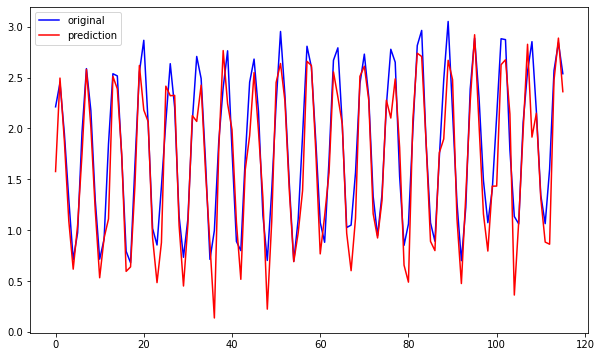

In [201]:
plt.figure(figsize=(10,6))
plt.plot(org ,'b' , label='original')
plt.plot(pre , 'r' ,label='prediction')
plt.legend()


# MSE for LSTM+Dropout

In [202]:
print("final val error : %f" %history_2.history['val_mean_squared_error'][-1])

final val error : 0.096494


# Simple RNN

In [57]:
data_time.shape

(600,)

In [67]:
len(data_time)

600

In [68]:
data_matrix = []
seq_len=4
data_dim=3


for i in range(0 , len(data_time) -(data_dim*seq_len)):
    tmp_data = data_time[i: i+(data_dim*seq_len)+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)

In [73]:
data_x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:12]
data_y = data_matrix_np[0:data_matrix_np.shape[0]-1:, 12]

In [74]:
data_x.shape , data_y.shape

((587, 12), (587,))

In [75]:
data_x = np.reshape(data_x, (-1,seq_len , data_dim))


In [76]:
data_y.shape , data_x.shape

((587,), (587, 4, 3))

In [77]:
trnx = data_x[:500,:]
trny = data_y[0:500]

tstx = data_x[500:, :]
tsty = data_y[500: ]
trnx.shape , trny.shape , tstx.shape,tsty.shape

((500, 4, 3), (500,), (87, 4, 3), (87,))

In [81]:
trnx[0].shape

(4, 3)

In [82]:
input_shape = trnx[0].shape

In [84]:
model_4 = keras.Sequential()
model_4.add(layers.SimpleRNN(50, input_shape = input_shape, return_sequences = True))   # return_sequences parameter has to be set True to stack
model_4.add(layers.SimpleRNN(50, return_sequences = False))
model_4.add(layers.Dense(1))
model_4.add(layers.Activation('linear'))
model_4.compile(optimizer='Adam' , loss='mean_squared_error', metrics=['mean_squared_error'])
#history_3 = model_4.fit(t_x,t_y , validation_data=[te_x,te_y],epochs=300,batch_size=32)

In [85]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 4, 50)             2700      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [88]:
history_4 = model_4.fit(trnx,trny , validation_data=[tstx,tsty],epochs=300,batch_size=32)


Train on 500 samples, validate on 87 samples
Epoch 1/300
500/500 [==============================] - 0s 436us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 2/300
500/500 [==============================] - 0s 399us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 3/300
500/500 [==============================] - 0s 395us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 4/300
500/500 [==============================] - 0s 431us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5/300
500/500 [==============================] - 0s 408us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 6/300
500/500 [==============================] - 0s 393us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val

500/500 [==============================] - 0s 424us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 50/300
500/500 [==============================] - 0s 418us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 51/300
500/500 [==============================] - 0s 392us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 52/300
500/500 [==============================] - 0s 390us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 53/300
500/500 [==============================] - 0s 384us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 54/300
500/500 [==============================] - 0s 403us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch

Epoch 98/300
500/500 [==============================] - 0s 382us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 99/300
500/500 [==============================] - 0s 385us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 100/300
500/500 [==============================] - 0s 384us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 101/300
500/500 [==============================] - 0s 382us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 102/300
500/500 [==============================] - 0s 384us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 103/300
500/500 [==============================] - 0s 388us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0227 - val_mean_squared_er

500/500 [==============================] - 0s 414us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 147/300
500/500 [==============================] - 0s 408us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 148/300
500/500 [==============================] - 0s 399us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 149/300
500/500 [==============================] - 0s 403us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 150/300
500/500 [==============================] - 0s 405us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 151/300
500/500 [==============================] - 0s 417us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0182 - val_mean_squared_error: 0.0182


500/500 [==============================] - 0s 478us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 195/300
500/500 [==============================] - 0s 463us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 196/300
500/500 [==============================] - 0s 475us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 197/300
500/500 [==============================] - 0s 452us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 198/300
500/500 [==============================] - 0s 432us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 199/300
500/500 [==============================] - 0s 447us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0145 - val_mean_squared_error: 0.0145


500/500 [==============================] - 0s 444us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 243/300
500/500 [==============================] - 0s 480us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 244/300
500/500 [==============================] - 0s 460us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 245/300
500/500 [==============================] - 0s 411us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 246/300
500/500 [==============================] - 0s 411us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 247/300
500/500 [==============================] - 0s 417us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0316 - val_mean_squared_error: 0.0316


500/500 [==============================] - 0s 404us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 291/300
500/500 [==============================] - 0s 422us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 292/300
500/500 [==============================] - 0s 379us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 293/300
500/500 [==============================] - 0s 374us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 294/300
500/500 [==============================] - 0s 382us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 295/300
500/500 [==============================] - 0s 385us/sample - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0273 - val_mean_squared_error: 0.0273


In [205]:
#save history of model
with open('model_4_history','wb') as file_pi:
     pickle.dump(history_4.history, file_pi)

# load history of model
# history_4 = pickle.load(open('model_4_history', "rb"))



#model saved as best_hyper_tuned_model_num2

model_4.save('model_4.h5')

#to load model
#model_4 = tf.keras.models.load_model('model_4.h5')

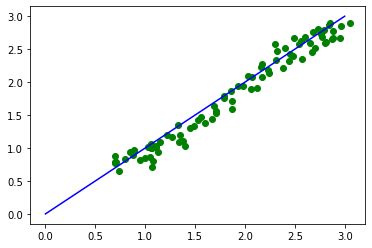

In [93]:
plt.scatter(tsty,model_4.predict(tstx) ,color='g')
plt.plot([0,3],[0,3],color='b')

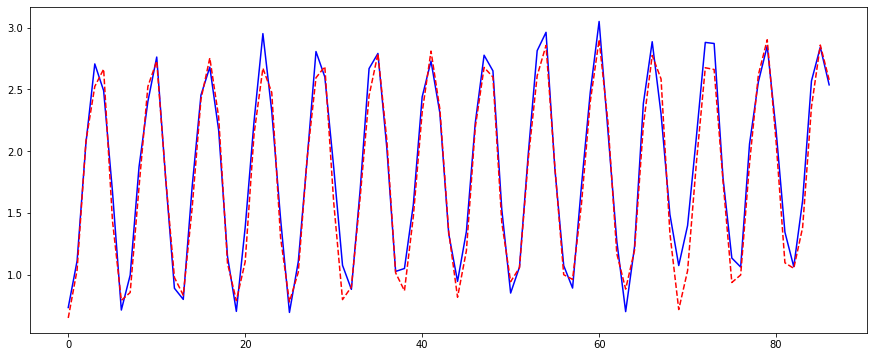

In [100]:
plt.figure(figsize=(15,6))
plt.plot(range(tsty.shape[0]) , tsty , 'b-')
plt.plot(range(tsty.shape[0]) , model_4.predict(tstx) ,'r--')

# MSE of Simple RNN+Batch norm many-one Structure

In [101]:
print("final val error : %f" %history_4.history['val_mean_squared_error'][-1])

final val error : 0.021200
